In [104]:
# We are trying to get the variable who are directly correlated to gross income 
# For example When budget increases film makers do expect the increment in gross
# In short what are the factors who kind of effect the revenue of film


import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline 

matplotlib.rcParams['figure.figsize'] = (12, 8)


df = pd.read_csv(r'movies.csv')

In [153]:
# Glance At the data 

df.head()

name  rating  genre  year   released  score    votes  director  writer  \
0  6587       6      6  1980 1980-06-13    8.4   927000      2589    4014   
1  5573       6      1  1980 1980-07-02    5.8    65000      2269    1632   
2  5142       4      0  1980 1980-06-20    8.7  1200000      1111    2567   
3   286       4      4  1980 1980-07-02    7.7   221000      1301    2000   
4  1027       6      4  1980 1980-07-25    7.3   108000      1054     521   

   star  country    budget      gross  company  runtime  correct_year  
0  1047       54  19000000   46998772     2319    146.0             0  
1   327       55   4500000   58853106      731    104.0             0  
2  1745       55  18000000  538375067     1540    124.0             0  
3  2246       55   3500000   83453539     1812     88.0             0  
4   410       55   6000000   39846344     1777     98.0             0

In [105]:
#Lets check the percentage of a missing data in each column

for col in df.columns:
    missing_percentage = np.mean(df[col].isnull())
    print("{} - {}%".format(col, missing_percentage))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# Displaying all the rows with null values 
'''
rows_with_null = df[df.isnull().any(axis = 1)]
from IPython.core.display import display, HTML
font_size = 1
print(rows_with_null)'''


In [106]:
# Data Type for Our Columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
# Lets Do Some Data Cleaning First

In [107]:
# Let's Start Cleaing by handling missing values and changing data types


# But these columns have sum NaN values as we can see in missing_percentage
# We need to fill those values first, using fillna function

mean_votes = df['votes'].mean()
print(mean_votes)

mean_budget = df['budget'].mean()
print(mean_budget)

mean_gross = df['gross'].mean()
print(mean_gross)



df['votes'] = df['votes'].fillna(mean_votes).astype('int64')
df['budget'] = df['budget'].fillna(mean_budget).astype('int64')
df['gross'] = df['gross'].fillna(mean_gross).astype('int64')

88108.50476190477
35589876.192650534
78500541.01778312


In [ ]:
''' So in our data set, we can see there are number of values in which 
    values of year in release date and release year(which are 2 different columns) 
    don't match 
    
    for ex. movie superman 2 release date is June 19, 1981
    but release year is 1980
    
    we have this mismatch soo many times in our dataset
    
    Let's try to fix this first '''

In [108]:
#this is to remove country from released date
df['released'] = df['released'].str.replace(r'\s*\([^)]*\)\s*', '', regex=True)

In [109]:
#this is converting released data type to datetime 
df['released'] = pd.to_datetime(df['released'], errors = 'coerce') 

In [110]:
# df['correct_year'] = df['released'].dt.year      
# other way
df['correct_year'] = df['released'].astype('str').str[:4]

In [111]:
pd.set_option('display.max_rows', None)

In [155]:
df_sorted = df.sort_values(by = ['gross'], inplace = False, ascending=False)
df_sorted.head()

name  rating  genre  year   released  score    votes  director  writer  \
5445   533       5      0  2009 2009-12-18    7.8  1100000      1155    1778   
7445   535       5      0  2019 2019-04-26    8.4   903000       162     743   
3045  6896       5      6  1997 1997-12-19    7.8  1100000      1155    1778   
6663  5144       5      0  2015 2015-12-18    7.8   876000      1125    2550   
7244   536       5      0  2018 2018-04-27    8.4   897000       162     743   

      star  country     budget       gross  company  runtime  correct_year  
5445  2334       55  237000000  2847246203     2253    162.0            29  
7445  2241       55  356000000  2797501328     1606    181.0            39  
3045  1595       55  200000000  2201647264     2253    194.0            17  
6663   524       55  245000000  2069521700     1540    138.0            35  
7244  2241       55  321000000  2048359754     1606    149.0            38

In [157]:
# Now let's remove any duplicates in data set
# We can drop any duplicates but according to the nature of our data set
# we can not drop duplicates because companies or directors or even actors can occur again and again 
# Becuase any of them can make multiple successful movies 

dupl = df['company'].drop_duplicates().sort_values(ascending=False)

''' Sometimes things can happen like this 
    Zentropa International Norway
    Zentropa Entertainments
    
    these 2 are different companies but 
    
    but if below is the case 
    Zentropa Entertainment
    Zentropa Entertainments
    then this should be handled as a mistake 
'''

In [ ]:
''' Lets Work on Correlation now '''

In [ ]:
# Question. We need To Find the Variables having high correlation with Gross 

# My Prediction 

# Budget has high Correlation with Gross
# Company can have high correlation

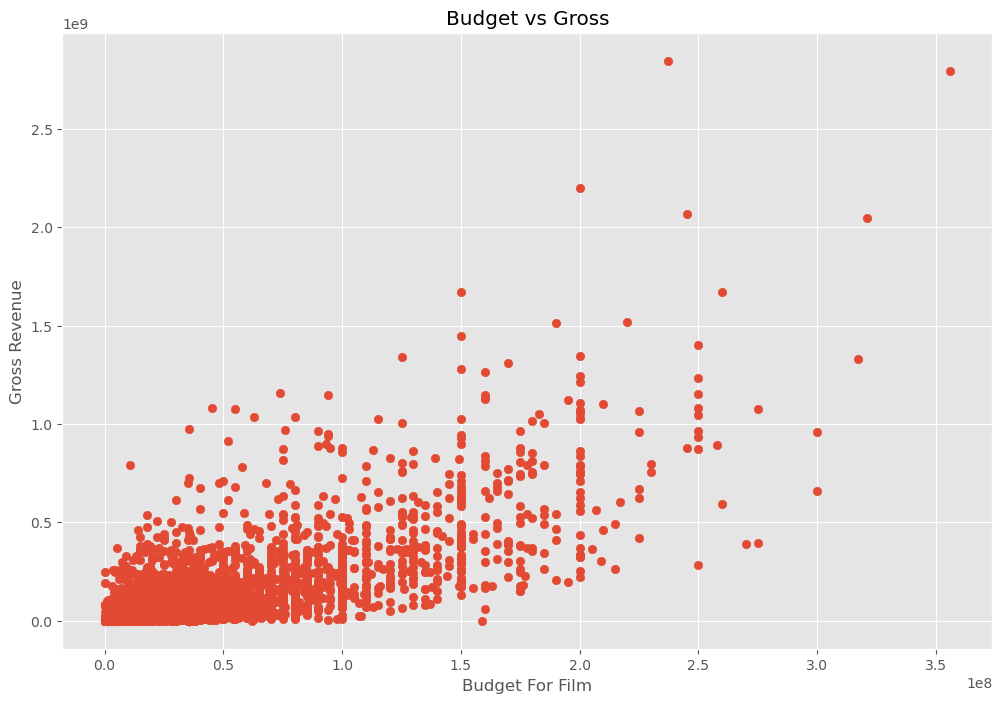

In [113]:
# Scatter plot of budget and gross

plt.scatter(x=df['budget'], y= df['gross'])

plt.title("Budget vs Gross")
plt.ylabel('Gross Revenue')
plt.xlabel('Budget For Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

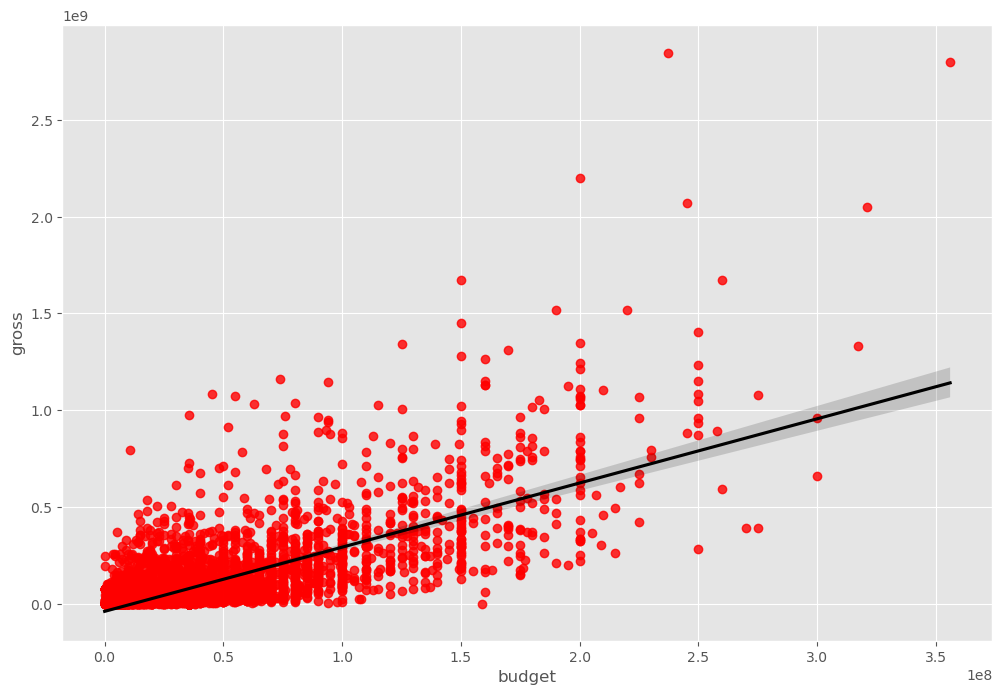

In [114]:
# Plot Budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})

In [ ]:
# Lets do some correlation using different methods 
# Study in some depth about correlations 

In [115]:
# bcz can not be done on object or string data type

non_numeric_columns = df.select_dtypes(include=['object']).columns
df_numeric = df.drop(columns=non_numeric_columns)

df_numeric.corr(method='pearson')


year  released     score     votes    budget     gross   runtime
year      1.000000  0.438382  0.097995  0.222810  0.265578  0.252042  0.120811
released  0.438382  1.000000  0.035082  0.118985  0.114845  0.121969  0.063762
score     0.097995  0.035082  1.000000  0.409182  0.064554  0.182868  0.399451
votes     0.222810  0.118985  0.409182  1.000000  0.421007  0.628713  0.309174
budget    0.265578  0.114845  0.064554  0.421007  1.000000  0.711270  0.265305
gross     0.252042  0.121969  0.182868  0.628713  0.711270  1.000000  0.241336
runtime   0.120811  0.063762  0.399451  0.309174  0.265305  0.241336  1.000000

In [116]:
df_numeric.corr(method='kendall')

year  released     score     votes    budget     gross   runtime
year      1.000000  0.972863  0.067652  0.331581  0.144258  0.182415  0.097184
released  0.972863  1.000000  0.073295  0.324448  0.139606  0.176308  0.097099
score     0.067652  0.073295  1.000000  0.300115  0.003530  0.080368  0.283611
votes     0.331581  0.324448  0.300115  1.000000  0.161337  0.508040  0.198253
budget    0.144258  0.139606  0.003530  0.161337  1.000000  0.258476  0.161757
gross     0.182415  0.176308  0.080368  0.508040  0.258476  1.000000  0.156061
runtime   0.097184  0.097099  0.283611  0.198253  0.161757  0.156061  1.000000

In [117]:
df_numeric.corr(method='spearman')

year  released     score     votes    budget     gross   runtime
year      1.000000  0.993503  0.099045  0.470008  0.202558  0.267101  0.142977
released  0.993503  1.000000  0.108641  0.466370  0.198304  0.260201  0.144851
score     0.099045  0.108641  1.000000  0.428138  0.004735  0.118024  0.399857
votes     0.470008  0.466370  0.428138  1.000000  0.234535  0.688687  0.290177
budget    0.202558  0.198304  0.004735  0.234535  1.000000  0.361668  0.227921
gross     0.267101  0.260201  0.118024  0.688687  0.361668  1.000000  0.227892
runtime   0.142977  0.144851  0.399857  0.290177  0.227921  0.227892  1.000000

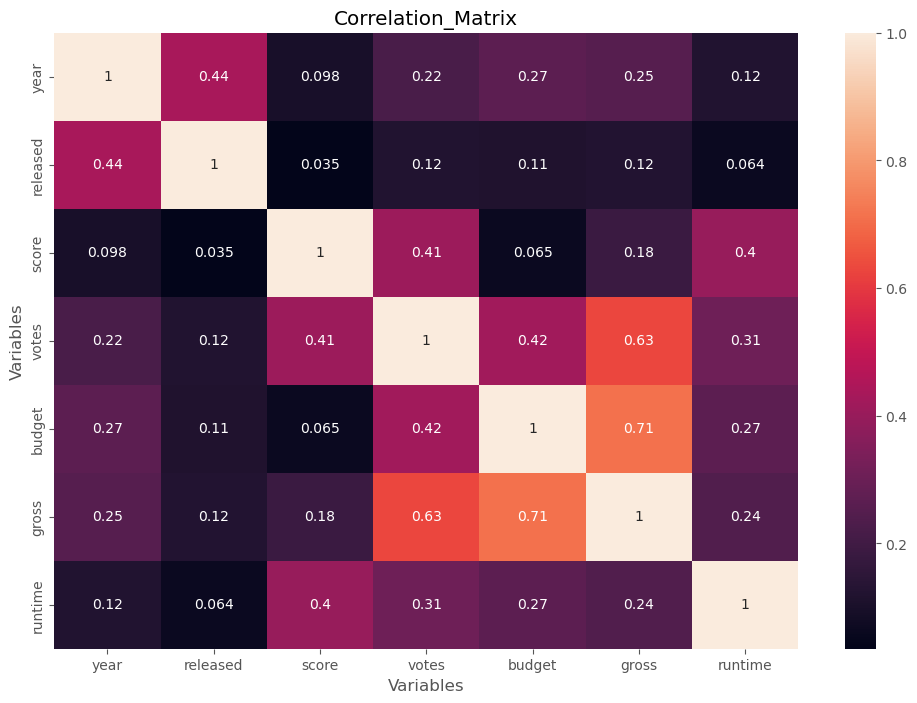

In [132]:
# High correlation between budget and growth

correlation_matrix_b = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation_Matrix")
plt.ylabel('Variables')
plt.xlabel('Variables')
plt.show()

In [ ]:
# Let's do company vs gross now

In [ ]:
'''
    Gross is data type of int64
    but company is object
    we have to give each company a unique numeric representation 

'''



In [ ]:
# we are making a numeric representation of our data frame 
# which means every column with object data type will get a numeric representation 

In [120]:
df_category = df

In [124]:
for col_name in df_category.columns:
    if (df_category[col_name].dtype == 'object'):
        df_category[col_name] = df_category[col_name].astype('category')
        df_category[col_name] = df_category[col_name].cat.codes
df_category

name  rating  genre  year   released  score    votes  director  writer  \
0     6587       6      6  1980 1980-06-13    8.4   927000      2589    4014   
1     5573       6      1  1980 1980-07-02    5.8    65000      2269    1632   
2     5142       4      0  1980 1980-06-20    8.7  1200000      1111    2567   
3      286       4      4  1980 1980-07-02    7.7   221000      1301    2000   
4     1027       6      4  1980 1980-07-25    7.3   108000      1054     521   
5     2109       6     10  1980 1980-05-09    6.4   123000      2528    4362   
6     5574       6      0  1980 1980-06-20    7.9   188000      1412     838   
7     4436       6      3  1980 1980-12-19    8.2   330000      1829    1769   
8     5281       4      0  1980 1981-06-19    6.8   101000      2306    1979   
9     6213       6      3  1980 1980-05-16    7.0    10000      2864     423   
10     463       4      0  1980 1980-12-17    6.1    18000       357    3985   
11    5920       4      1  1980 1984-10-26    7.3    54000      1199    1832   
12    4315       4      1  1980 1980-12-12    5.3    30000      2352    2333   
13    4084       6      6  1980 1980-09-19    7.7    49000      2388    2327   
14    1687       6      5  1980 1980-07-25    7.1    37000       318     520   
15    5024       4      6  1980 1980-10-03    7.2    27000      1243    3548   
16    1900       6      6  1980 1980-05-16    6.6    21000        49     735   
17      92       4      4  1980 1980-12-19    6.9    29000       514    3262   
18    5865       6     10  1980 1980-02-08    6.8    66000      1374    2104   
19    5189       6      4  1980 1980-12-12    6.8    26000      2561     556   
20    1387       6      5  1980 1980-02-15    6.5    20000      2891    4451   
21    2451       6      1  1980 1981-04-24    6.8    14000      1892    2926   
22    5845       4      0  1980 1980-08-01    6.7    22000       744    4192   
23    7445       4      8  1980 1980-08-08    5.3    12000      2371    3528   
24    7127       4      6  1980 1980-06-06    6.4    14000      1153      12   
25     346       6     10  1980 1980-12-25    6.9    33000      1583    3234   
26    3263       6      4  1980 1980-03-21    6.5     5100      2433    2483   
27    4442       4      0  1980 1980-08-01    5.0     4100      1282      33   
28     980       6      5  1980 1980-06-20    7.2    17000      2673    4386   
29     362       6      5  1980 1980-02-01    6.2    22000      2151    3326   
30    3796       4      4  1980 1980-09-26    7.1     8900      2811      83   
31    4373       6     10  1980 1980-07-18    5.4    16000      2143    4455   
32    4987       4      0  1980 1980-08-15    5.3    15000      1041    1587   
33    1103       4      6  1980 1981-04-24    6.1      604      1644     958   
34    4785       4      4  1980 1980-12-19    6.7     9100      1225    3136   
35    4362       6      4  1980 1980-10-10    6.2    24000      1091    3107   
36    6008       6      4  1980 1980-05-30    6.3     4300       855    1358   
37    3721       6      4  1980 1980-10-24    6.0    11000      1598    3642   
38    6102       4      6  1980 1980-12-19    5.9     4000      2296    3826   
39    1244       4      3  1980 1980-03-07    7.5    17000      1884    4201   
40    6748       4      7  1980 1981-10-09    6.3     5700      1403     518   
41     927       4      6  1980 1980-07-03    7.9    13000       335    2252   
42    6644       6      0  1980 1980-06-27    7.1     9000      2314    2543   
43    7305       6      3  1980 1980-04-25    6.6    11000       186    1682   
44    5504       6     10  1980 1980-10-31    4.8     2000      1978     151   
45    1152       6      4  1980 1980-07-18    6.1    12000      2804    4298   
46    6094       6      0  1980 1980-06-13    5.3     3900      1934    3357   
47    5578       6     10  1980 1980-11-07    4.6     3900      2836    4344   
48    6360       4      0  1980 1980-05-09    5.1     3100       509    2893   
49    

Text(0.5, 1.0, 'Company vs Gross')

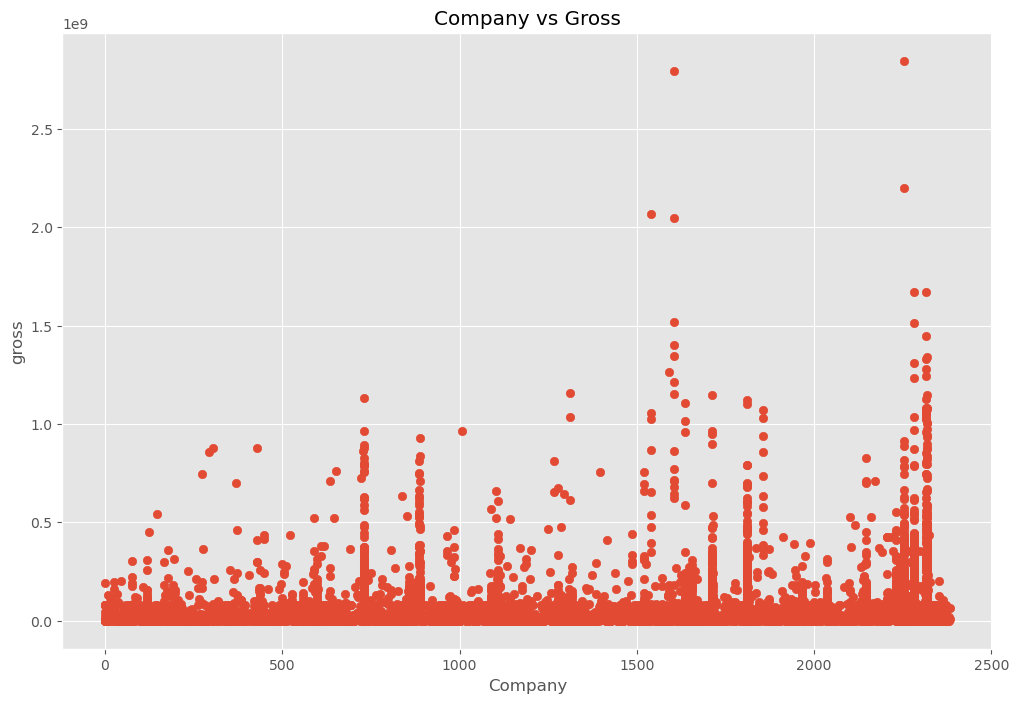

In [128]:
# Scatter Plot for Company vs Gross


plt.scatter(x=df['company'], y=df['gross'])
plt.xlabel('Company')
plt.ylabel('gross')
plt.title('Company vs Gross')

<Axes: xlabel='company', ylabel='gross'>

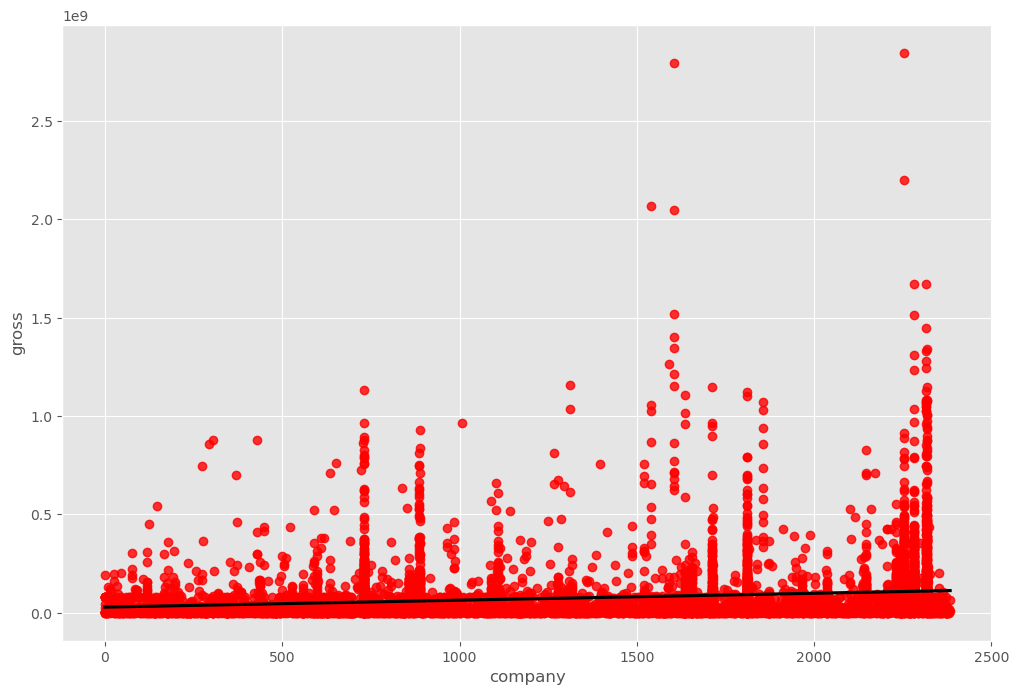

In [130]:
# # Plot Company vs gross using seaborn 

sns.regplot(x = 'company', y= 'gross', data= df_category, line_kws = {'color' : 'Black'}, scatter_kws= {'color' : 'red'})

In [ ]:
# Let's Do Some Correlation now 

In [131]:
df_category.corr(method= 'pearson')

name    rating     genre      year  released     score  \
name          1.000000 -0.008069  0.016355  0.011453 -0.004951  0.017097   
rating       -0.008069  1.000000  0.072423  0.008779 -0.010258 -0.001314   
genre         0.016355  0.072423  1.000000 -0.081261 -0.080051  0.027965   
year          0.011453  0.008779 -0.081261  1.000000  0.438382  0.097995   
released     -0.004951 -0.010258 -0.080051  0.438382  1.000000  0.035082   
score         0.017097 -0.001314  0.027965  0.097995  0.035082  1.000000   
votes         0.013086  0.033127 -0.145276  0.222810  0.118985  0.409182   
director      0.009079  0.019483 -0.015258 -0.020795  0.003426  0.009559   
writer        0.009081 -0.005921  0.006567 -0.008656  0.008115  0.019416   
star          0.006472  0.013405 -0.005477 -0.027242  0.006276 -0.001609   
country      -0.010737  0.081244 -0.037615 -0.070938  0.016837 -0.133348   
budget        0.020368 -0.126046 -0.310566  0.265578  0.114845  0.064554   
gross         0.005466 -0.102116 -0.230267  0.252042  0.121969  0.182868   
company       0.009211 -0.032943 -0.071067 -0.010431  0.042653  0.001030   
runtime       0.010392  0.062145 -0.052711  0.120811  0.063762  0.399451   
correct_year  0.012835  0.009280 -0.063573  0.967486  0.214269  0.107219   

                 votes  director    writer      star   country    budget  \
name          0.013086  0.009079  0.009081  0.006472 -0.010737  0.020368   
rating        0.033127  0.019483 -0.005921  0.013405  0.081244 -0.126046   
genre        -0.145276 -0.015258  0.006567 -0.005477 -0.037615 -0.310566   
year          0.222810 -0.020795 -0.008656 -0.027242 -0.070938  0.265578   
released      0.118985  0.003426  0.008115  0.006276  0.016837  0.114845   
score         0.409182  0.009559  0.019416 -0.001609 -0.133348  0.064554   
votes         1.000000  0.000260  0.000891 -0.019277  0.073622  0.421007   
director      0.000260  1.000000  0.299067  0.039234  0.017490 -0.010364   
writer        0.000891  0.299067  1.000000  0.027245  0.015343 -0.033216   
star         -0.019277  0.039234  0.027245  1.000000 -0.012998 -0.016628   
country       0.073622  0.017490  0.015343 -0.012998  1.000000  0.039000   
budget        0.421007 -0.010364 -0.033216 -0.016628  0.039000  1.000000   
gross         0.628713 -0.014272 -0.023210 -0.002682  0.089949  0.711270   
company       0.133129  0.004404  0.005646  0.012442  0.095548  0.144851   
runtime       0.309174  0.017624 -0.003511  0.010174 -0.078412  0.265305   
correct_year  0.206358 -0.022579 -0.010063 -0.031166 -0.090962  0.252811   

                 gross   company   runtime  correct_year  
name          0.005466  0.009211  0.010392      0.012835  
rating       -0.102116 -0.032943  0.062145      0.009280  
genre        -0.230267 -0.071067 -0.052711     -0.063573  
year          0.252042 -0.010431  0.120811      0.967486  
released      0.121969  0.042653  0.063762      0.214269  
score         0.182868  0.001030  0.399451      0.107219  
votes         0.628713  0.133129  0.309174      0.206358  
director     -0.014272  0.004404  0.017624     -0.022579  
writer       -0.023210  0.005646 -0.003511     -0.010063  
star         -0.002682  0.012442  0.010174     -0.031166  
country       0.089949  0.095548 -0.078412     -0.090962  
budget        0.711270  0.144851  0.265305      0.252811  
gross         1.000000  0.152694  0.241336      0.235487  
company       0.152694  1.000000  0.034402     -0.026492  
runtime       0.241336  0.034402  1.000000      0.115317  
correct_year  0.235487 -0.026492  0.115317      1.000000

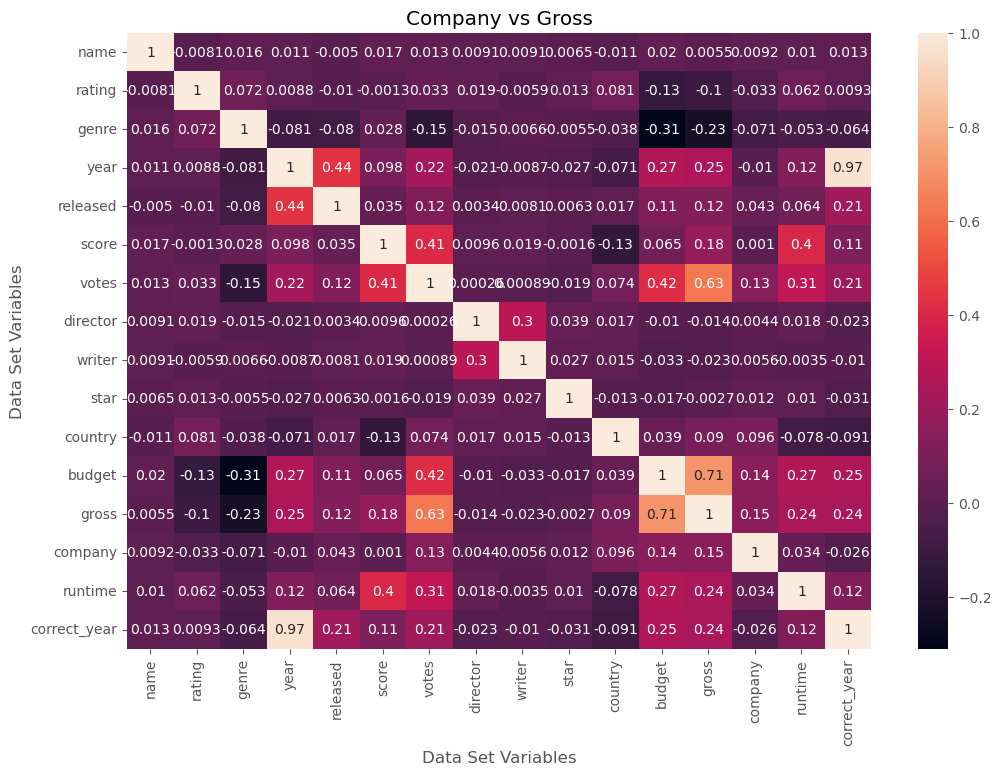

In [140]:
correlation_matrix_c = df_category.corr(method='pearson')

sns.heatmap(correlation_matrix_c, annot= True)

plt.title('Company vs Gross')

plt.xlabel('Data Set Variables')

plt.ylabel('Data Set Variables')

plt.show()

In [ ]:
# Company has very low correlation with gross

In [ ]:
# Let's Unstack the correlation 

In [151]:
correlation_pairs = correlation_matrix_c.unstack()

sorted_pairs = correlation_pairs.sort_values()
        
high_corr = sorted_pairs[sorted_pairs >= 0.5]

high_corr



votes         gross           0.628713
gross         votes           0.628713
budget        gross           0.711270
gross         budget          0.711270
year          correct_year    0.967486
correct_year  year            0.967486
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

In [ ]:
# My Hypothesis is Votes and Budget has high correlation with earnings

# Company Has low correlation